# Introduction:
In this section we have looked into the two accidents datasets (incedent & driver details) to investigate if there is any correlation between accident occurrences and the hours of the day, the days of the week, the location on the road regards junctions and other road features and the gender of the driver. In this notebook we have analised data for England for the period from 2010 to 2016. To add context to this data we have also reviewed how traffic volumes have changed over the same period.

# Main conclusions:
Most accidents happen during the commuting time, there are split fairly evenly between the morning and evening commute alsthough when you review the detail by the specific hours of the day there is a gradual increase from 3.00pm up to a peak between 5 and 6 pm. In the morningthere is a clear rise in accident between 8am and 9am. over the period from 2010 to 2016 the number of accidents rises gradually from Monday to Friday.
Men have been the driver involved in more accidents than women, and those accisdent are mor likly to be serious or even fatal and the age group that has been involved in most accidents is between 26 and 35.

The data shows that the time between the two commuting times (Day Time) is when you are most likly to be involved in a fatal accident.




In [1]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy.stats as sts
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [3]:
#read in data file

traffic_vol_df = pd.read_csv("Resources/traffic_vol_2010_to2016.csv")

#traffic_vol_df = traffic_vol_df.set_index("Year")

traffic_vol_df

Year  Cars and Taxis  Light Commercial\nVehicles 1  Heavy Goods Vehicles 2  \
0  2010           241.9                          41.4                    16.4   
1  2011           244.3                          42.0                    16.0   
2  2012           245.5                          42.2                    15.6   
3  2013           246.6                          43.8                    15.8   
4  2014           253.5                          46.6                    16.2   
5  2015           258.1                          48.9                    16.8   
6  2016           263.9                          51.7                    17.0   

   Motorcycles  Buses & Coaches  All motor vehicles  
0          2.9              3.2               305.8  
1          2.9              3.0               308.2  
2          2.9              2.8               309.0  
3          2.8              2.9               311.9  
4          2.9              2.9               322.2  
5          2.9              2.8               329.6  
6          3.0              2.6               338.2

<IPython.core.display.Javascript object>


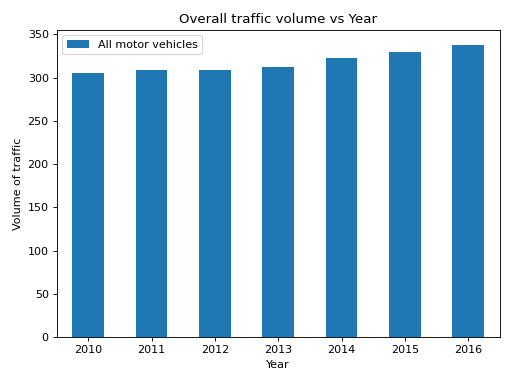

In [4]:
traffic_vol_df["All motor vehicles"] = traffic_vol_df["All motor vehicles"]
sorted_traffic_vol_df = traffic_vol_df.sort_values("Year", ascending=True)
sorted_traffic_vol_df.plot.bar(x="Year", y="All motor vehicles", linestyle="-")
plt.title('Overall traffic volume vs Year')
plt.xticks(rotation = 0,)

plt.xlabel("Year")
plt.ylabel("Volume of traffic")
plt.legend(loc="upper left")
plt.savefig("Presentation_images/Overall_traffic_volume.png", bbox_inches = "tight")
plt.tight_layout()


In [5]:
#Read in cleased data file
file_5 = "Resources/all.csv"
when_df = pd.read_csv(file_5)

when_df.head()

C:\Users\Gary Whitney\anaconda\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Unnamed: 0 Accident_Index 1st_Road_Class Accident_Severity  Year  \
0      478587  201001BS70003              B            Slight  2010   
1      478588  201001BS70004              A            Slight  2010   
2      478589  201001BS70007   Unclassified            Slight  2010   
3      478590  201001BS70007   Unclassified            Slight  2010   
4      478591  201001BS70008              A            Slight  2010   

         Date Day_of_Week   Latitude       Light_Conditions  \
0  2010-01-11      Monday  51.484087               Daylight   
1  2010-01-11      Monday  51.509212  Darkness - lights lit   
2  2010-01-02    Saturday  51.513314  Darkness - lights lit   
3  2010-01-02    Saturday  51.513314  Darkness - lights lit   
4  2010-01-04      Monday  51.484361  Darkness - lights lit   

  Local_Authority_(District)  ...  Journey_Purpose_of_Driver  \
0     Kensington and Chelsea  ...     Commuting to/from work   
1     Kensington and Chelsea  ...    Journey as part of work   
2     Kensington and Chelsea  ...  Other/Not known (2005-10)   
3     Kensington and Chelsea  ...  Other/Not known (2005-10)   
4     Kensington and Chelsea  ...    Journey as part of work   

                              Junction_Location      make  \
0  Mid Junction - on roundabout or on main road   CITROEN   
1  Mid Junction - on roundabout or on main road   RENAULT   
2  Mid Junction - on roundabout or on main road    NISSAN   
3  Mid Junction - on roundabout or on main road  MERCEDES   
4  Mid Junction - on roundabout or on main road  VAUXHALL   

                 model Propulsion_Code Sex_of_Driver  Towing_and_Articulation  \
0   BERLINGO FIRST 600          Petrol        Female      No tow/articulation   
1   SCENIC DYN DCI 130       Heavy oil          Male      No tow/articulation   
2      PRIMERA SVE CVT          Petrol        Female      No tow/articulation   
3        A140 ELEGANCE          Petrol        Female      No tow/articulation   
4  ZAFIRA ELEGANCE DTI       Heavy oil          Male      No tow/articulation   

             Vehicle_Manoeuvre                         Vehicle_Type  \
0                Turning right  Van / Goods 3.5 tonnes mgw or under   
1            Going ahead other                                  Car   
2  Going ahead right-hand bend                                  Car   
3            Going ahead other                                  Car   
4                Turning right                Taxi/Private hire car   

  Was_Vehicle_Left_Hand_Drive  
0                          No  
1                          No  
2                          No  
3                          No  
4                          No  

[5 rows x 33 columns]

<IPython.core.display.Javascript object>


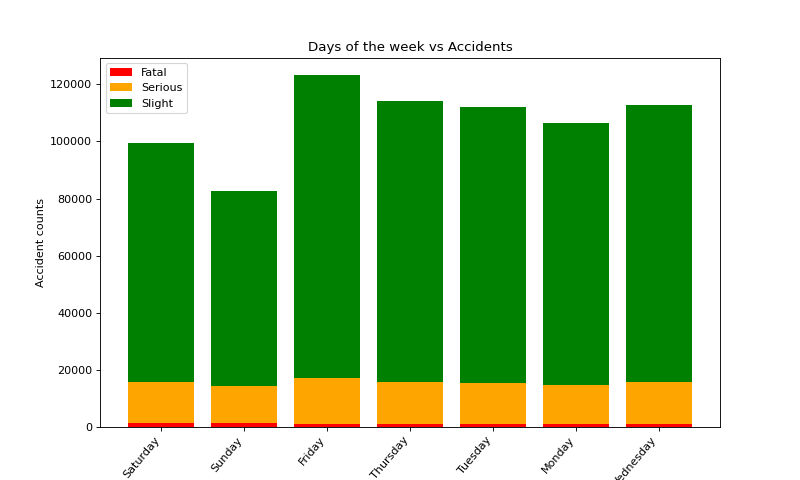

In [6]:
# create a stacked plot and save to Images folder
accident_sev_dow = when_df.groupby(['Day_of_Week','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dow.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Day_of_Week']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Days of the week vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Days of the week")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper left")
plt.savefig("Presentation_images/Accident_distribution_Day_of_week.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


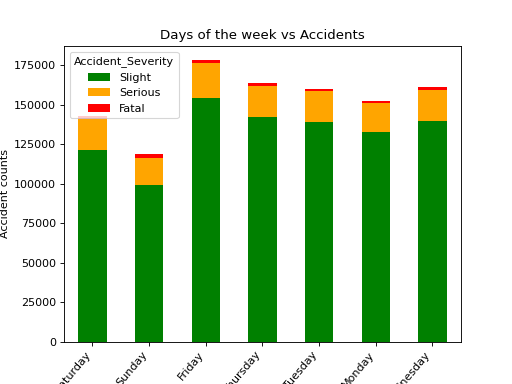

In [7]:
dow_group = when_df.groupby(['Day_of_Week','Accident_Severity'])
dow_group_count = dow_group["Accident_Severity"].count().unstack()
dow_group_count = dow_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
dow_group_count = dow_group_count[["Slight","Serious","Fatal"]]
dow_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Days of the week vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Day")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Presentation_images/Accident_distribution_day_of_week.png", bbox_inches = "tight")

The chart shows during the period from 2010 to 2016 Friday was the day when most accidents happen

In [8]:
#  Group all accidents by gender to create a dataframe to use to plot the distribution

group_by_gender = when_df.groupby(["Accident_Index","Sex_of_Driver"])
gender_df = pd.DataFrame(group_by_gender.size())

# Create the dataframe with total count of accidents by gender
gender = pd.DataFrame(gender_df.groupby(["Sex_of_Driver"]).count())
gender.columns = ["QTY"]

# caclcualte percentage of accidents by gender
gender["%"] = (100*(gender["QTY"]/gender["QTY"].sum()))

# create gender data frame
gender

QTY          %
Sex_of_Driver                                  
Data missing or out of range      24   0.002692
Female                        321393  36.043738
Male                          543098  60.907618
Not known                      27160   3.045953

<IPython.core.display.Javascript object>


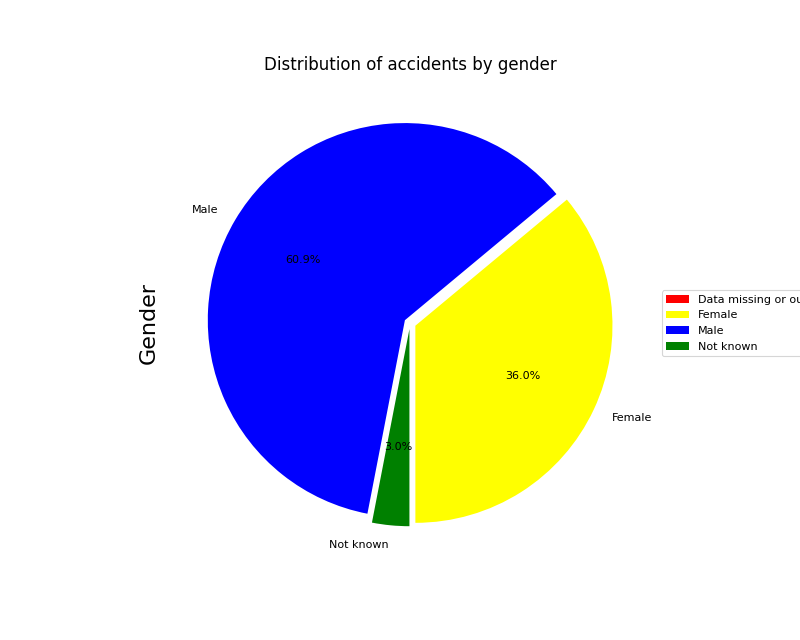

In [9]:
#Create a pie chart showing how accidents are distribute by Gender 
colors = ['red', 'yellow','blue','green']
explode = [2,0.03,0.03,0.03]
plot = gender.plot.pie(y='QTY',figsize=(10,8),colors = colors, startangle=270, shadow = False,explode=explode, autopct="%1.1f%%")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Distribution of accidents by gender',fontsize = 15)
plt.ylabel('Gender',fontsize = 20)
plt.savefig("Presentation_images/Accident_distribution_gender.png", bbox_inches = "tight")
plt.show()

The chart shows during the period from 2010 to 2016 most accidents involved male drivers

In [10]:
# reduce to just the data that i want to report on and rename columns
df_1 = when_df[['Accident_Index', 'Year', 'Date','Day_of_Week' ,'Time','Accident_Severity','Number_of_Casualties','Junction_Location','Sex_of_Driver']]
df_1.columns = ['Index', 'Year', 'Date', 'Day','Time','Severity','Casualties','Location','Gender']
df_1

Index  Year        Date       Day   Time Severity  \
0        201001BS70003  2010  2010-01-11    Monday  07:30   Slight   
1        201001BS70004  2010  2010-01-11    Monday  18:35   Slight   
2        201001BS70007  2010  2010-01-02  Saturday  21:21   Slight   
3        201001BS70007  2010  2010-01-02  Saturday  21:21   Slight   
4        201001BS70008  2010  2010-01-04    Monday  20:35   Slight   
...                ...   ...         ...       ...    ...      ...   
1077648  2016984130916  2016  2016-10-28    Friday  06:45   Slight   
1077649  2016984130916  2016  2016-10-28    Friday  06:45   Slight   
1077650  2016984131116  2016  2016-11-01   Tuesday  16:45   Slight   
1077651  2016984131316  2016  2016-10-29  Saturday  20:00   Slight   
1077652  2016984133416  2016  2016-12-25    Sunday  12:30   Slight   

         Casualties                                           Location  \
0                 1       Mid Junction - on roundabout or on main road   
1                 1       Mid Junction - on roundabout or on main road   
2                 1       Mid Junction - on roundabout or on main road   
3                 1       Mid Junction - on roundabout or on main road   
4                 1       Mid Junction - on roundabout or on main road   
...             ...                                                ...   
1077648           1  Cleared junction or waiting/parked at junction...   
1077649           1  Cleared junction or waiting/parked at junction...   
1077650           2       Mid Junction - on roundabout or on main road   
1077651           3             Not at or within 20 metres of junction   
1077652           2             Not at or within 20 metres of junction   

            Gender  
0           Female  
1             Male  
2           Female  
3           Female  
4             Male  
...            ...  
1077648     Female  
1077649  Not known  
1077650     Female  
1077651       Male  
1077652       Male  

[1077653 rows x 9 columns]

In [11]:
#Add a column to place the hour in for binning
df_1['Time_f'] = ''

<ipython-input-11-bf994e3ddc6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time_f'] = ''


In [12]:
# use to_datetime to convert the data in the Time column into data that can be binned using the cut function
df_1['Time_f']=pd.to_datetime(df_1['Time']).dt.hour

<ipython-input-12-7552eefa1cca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Time_f']=pd.to_datetime(df_1['Time']).dt.hour


In [13]:
# Set new index to 'Index'
df_2 = df_1.set_index("Index")
# Create the bins in which Data will be held  
bins = [0, 6, 10, 16, 19, 24]

# Create the names for the five bins
group_names = ["Early AM", "Morning Commute", "Day Time", "Evening Commute", "Late PM"]

In [14]:
# use pd.cut to add the relevant names into the Time Bin column and save the file as a csv into the resources folder 
df_2["Time_Bin"] = pd.cut(df_2["Time_f"], bins, labels=group_names, include_lowest=True)
df_2.to_csv("Resources/time_bin.csv")
df_2

Year        Date       Day   Time Severity  Casualties  \
Index                                                                   
201001BS70003  2010  2010-01-11    Monday  07:30   Slight           1   
201001BS70004  2010  2010-01-11    Monday  18:35   Slight           1   
201001BS70007  2010  2010-01-02  Saturday  21:21   Slight           1   
201001BS70007  2010  2010-01-02  Saturday  21:21   Slight           1   
201001BS70008  2010  2010-01-04    Monday  20:35   Slight           1   
...             ...         ...       ...    ...      ...         ...   
2016984130916  2016  2016-10-28    Friday  06:45   Slight           1   
2016984130916  2016  2016-10-28    Friday  06:45   Slight           1   
2016984131116  2016  2016-11-01   Tuesday  16:45   Slight           2   
2016984131316  2016  2016-10-29  Saturday  20:00   Slight           3   
2016984133416  2016  2016-12-25    Sunday  12:30   Slight           2   

                                                        Location     Gender  \
Index                                                                         
201001BS70003       Mid Junction - on roundabout or on main road     Female   
201001BS70004       Mid Junction - on roundabout or on main road       Male   
201001BS70007       Mid Junction - on roundabout or on main road     Female   
201001BS70007       Mid Junction - on roundabout or on main road     Female   
201001BS70008       Mid Junction - on roundabout or on main road       Male   
...                                                          ...        ...   
2016984130916  Cleared junction or waiting/parked at junction...     Female   
2016984130916  Cleared junction or waiting/parked at junction...  Not known   
2016984131116       Mid Junction - on roundabout or on main road     Female   
2016984131316             Not at or within 20 metres of junction       Male   
2016984133416             Not at or within 20 metres of junction       Male   

               Time_f         Time_Bin  
Index                                   
201001BS70003       7  Morning Commute  
201001BS70004      18  Evening Commute  
201001BS70007      21          Late PM  
201001BS70007      21          Late PM  
201001BS70008      20          Late PM  
...               ...              ...  
2016984130916       6         Early AM  
2016984130916       6         Early AM  
2016984131116      16         Day Time  
2016984131316      20          Late PM  
2016984133416      12         Day Time  

[1077653 rows x 10 columns]

In [15]:
# create a series to count the severity of all accidents
acc_count_2 = df_2['Time_Bin'].value_counts()
acc_count_2

Day Time           429112
Evening Commute    234266
Morning Commute    230698
Late PM            114544
Early AM            69033
Name: Time_Bin, dtype: int64

<IPython.core.display.Javascript object>


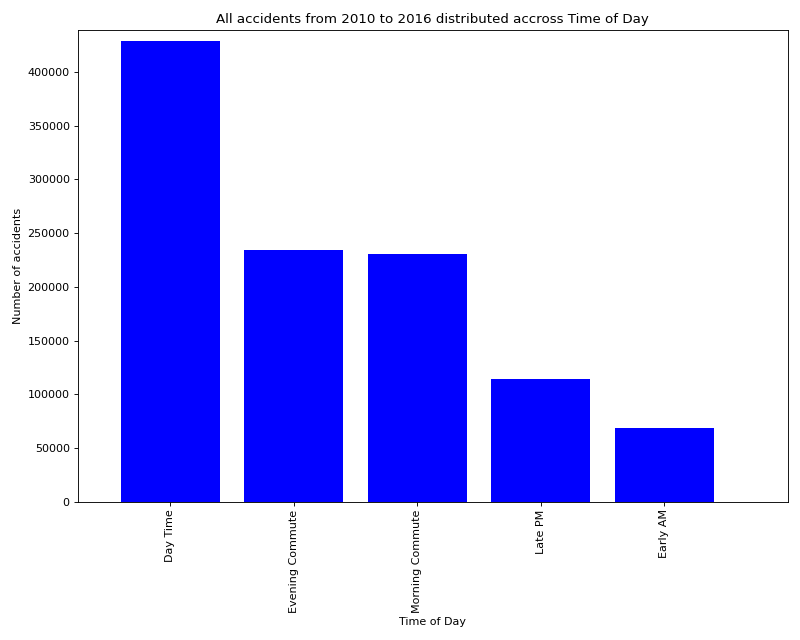

In [16]:
#  Generate a bar plot showing how all accidents from 2010 to 2016 are distributed accross the time of day
Time_of_Day= acc_count_2.index.values
No_of_accidents = acc_count_2.values
x_axis = np.arange(len(No_of_accidents))
# plot the bar chart 
plt.figure(figsize=(10,8))
plt.bar(x_axis, No_of_accidents, color="b", align="center")
# create a variable for Accident_Severity on the x axis and set the rotation
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Time_of_Day, rotation="vertical")
# set the limit of the x axis to position the bars within the chart
plt.xlim(-0.75, len(x_axis))
# set the limit of the y axis to position the top of the bars within the chart
plt.ylim(0, max(acc_count_2)+10000)
# add the titles
plt.title("All accidents from 2010 to 2016 distributed accross Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of accidents")
# Generate a bar plot
plt.tight_layout()
plt.savefig("Images/Accident_distribution_time_of_day")

The chart shows during the period from 2010 to 2016 most accidents happened between the two commuting times but also shows that the commuting times together have been the most dangerous 

In [17]:
# Using GroupBy in order to separate the data into fields according to the Year and Time Bin

when_count = df_2.groupby('Year')["Time_Bin"].value_counts()

when_count.head(20)

Year  Time_Bin       
2010  Day Time           58786
      Morning Commute    31436
      Evening Commute    30791
      Late PM            15616
      Early AM            9205
2011  Day Time           58991
      Evening Commute    32074
      Morning Commute    31516
      Late PM            15677
      Early AM            9134
2012  Day Time           56937
      Evening Commute    31022
      Morning Commute    30640
      Late PM            14965
      Early AM            8978
2013  Day Time           56231
      Evening Commute    31212
      Morning Commute    30742
      Late PM            14804
      Early AM            8798
Name: Time_Bin, dtype: int64

<IPython.core.display.Javascript object>


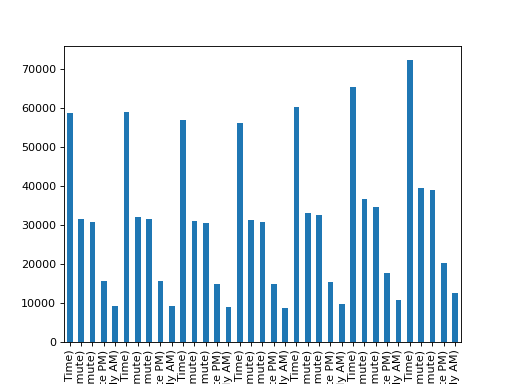

In [18]:
# visualise the data on a simple bar chart
when_count.plot(kind="bar")
plt.show()

In [19]:
#Read in cleased data file
file_6 = "Resources/time_bin.csv"
time_df = pd.read_csv(file_6)

time_df.head()

Index  Year        Date       Day   Time Severity  Casualties  \
0  201001BS70003  2010  2010-01-11    Monday  07:30   Slight           1   
1  201001BS70004  2010  2010-01-11    Monday  18:35   Slight           1   
2  201001BS70007  2010  2010-01-02  Saturday  21:21   Slight           1   
3  201001BS70007  2010  2010-01-02  Saturday  21:21   Slight           1   
4  201001BS70008  2010  2010-01-04    Monday  20:35   Slight           1   

                                       Location  Gender  Time_f  \
0  Mid Junction - on roundabout or on main road  Female       7   
1  Mid Junction - on roundabout or on main road    Male      18   
2  Mid Junction - on roundabout or on main road  Female      21   
3  Mid Junction - on roundabout or on main road  Female      21   
4  Mid Junction - on roundabout or on main road    Male      20   

          Time_Bin  
0  Morning Commute  
1  Evening Commute  
2          Late PM  
3          Late PM  
4          Late PM

<IPython.core.display.Javascript object>


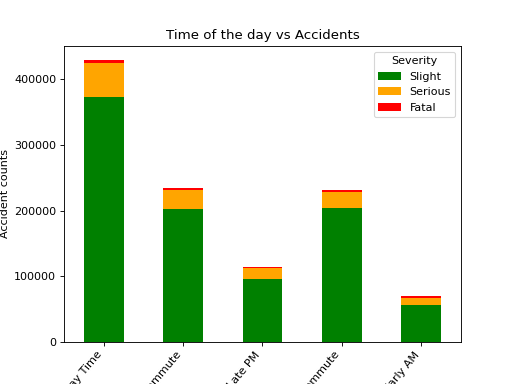

In [20]:
tod_group = time_df.groupby(["Time_Bin","Severity"])
tod_group_count = tod_group["Severity"].count().unstack()
tod_group_count = tod_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
tod_group_count = tod_group_count[["Slight","Serious","Fatal"]]
tod_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Time of the day vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Time of the day")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Images/Accident_distribution_time_of_day.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


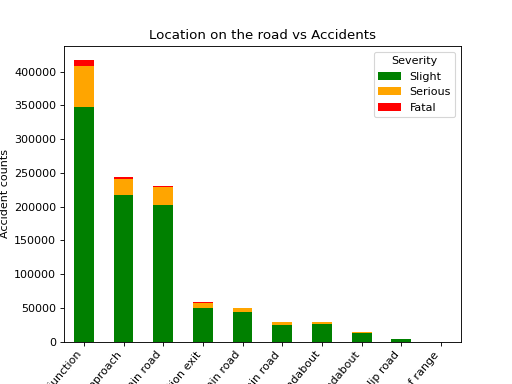

In [21]:
loc1_group = time_df.groupby(["Location","Severity"])
loc1_group_count = loc1_group["Severity"].count().unstack()
loc1_group_count = loc1_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
loc1_group_count = loc1_group_count[["Slight","Serious","Fatal"]]
loc1_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Location on the road vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Location on the road")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Presentation_images/Accident_distribution_location_on-the-road.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


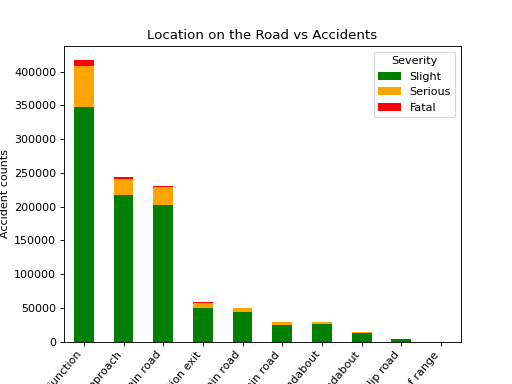

In [22]:
loc_group = time_df.groupby(["Location","Severity"])
loc_group_count = loc_group["Severity"].count().unstack()
loc_group_count = loc_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
loc_group_count = loc_group_count[["Slight","Serious","Fatal"]]
loc_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Location on the Road vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Location on the road")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Presentation_images/Accident_distribution_location_on_the_road.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


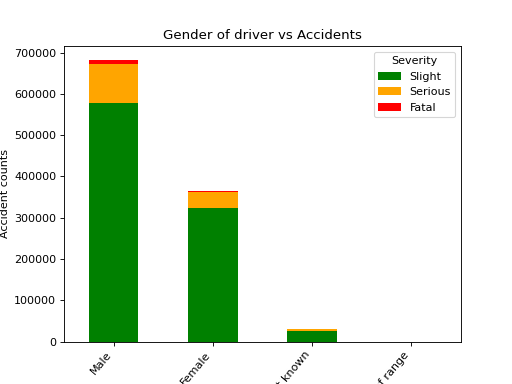

In [23]:
gen_group = time_df.groupby(["Gender","Severity"])
gen_group_count = gen_group["Severity"].count().unstack()
gen_group_count = gen_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
gen_group_count = gen_group_count[["Slight","Serious","Fatal"]]
gen_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Gender of driver vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Gender of driver")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Images/Accident_distribution_gender.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


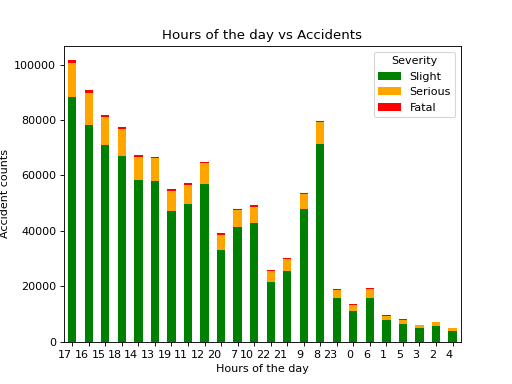

In [24]:
tod1_group = time_df.groupby(["Time_f","Severity"])
tod1_group_count = tod1_group["Severity"].count().unstack()
tod1_group_count = tod1_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
tod1_group_count = tod1_group_count[["Slight","Serious","Fatal"]]
tod1_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Hours of the day vs Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Hours of the day")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Images/Accident_distribution_hours_of_the_day.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


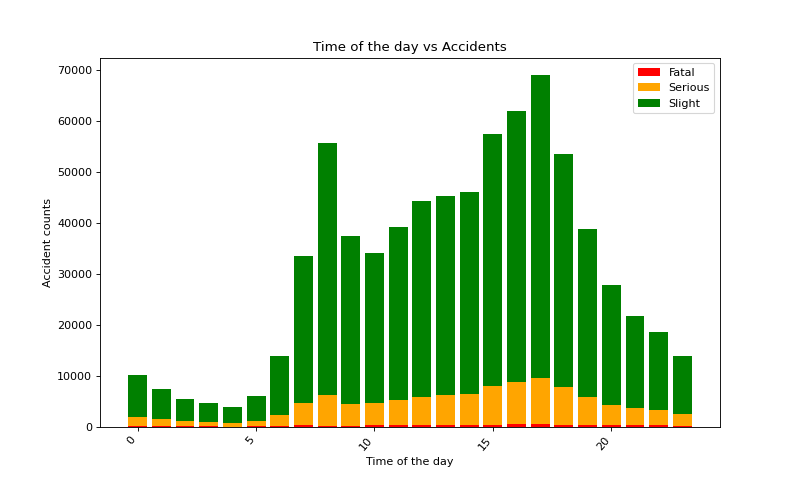

In [25]:
accident_sev_time = time_df.groupby(['Time_f','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_time.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Time_f']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Time of the day vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Time of the day")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_time_of_day_hrs.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


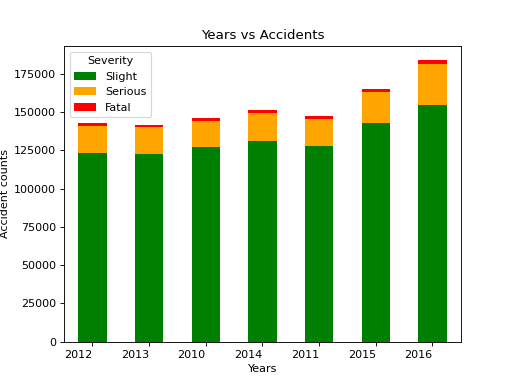

In [26]:
year_group = time_df.groupby(["Year","Severity"])
year_group_count = year_group["Severity"].count().unstack()
year_group_count = year_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=True)
year_group_count = year_group_count[["Slight","Serious","Fatal"]]
year_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Years vs Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Years")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Presentation_images/Accident_distribution_Years.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


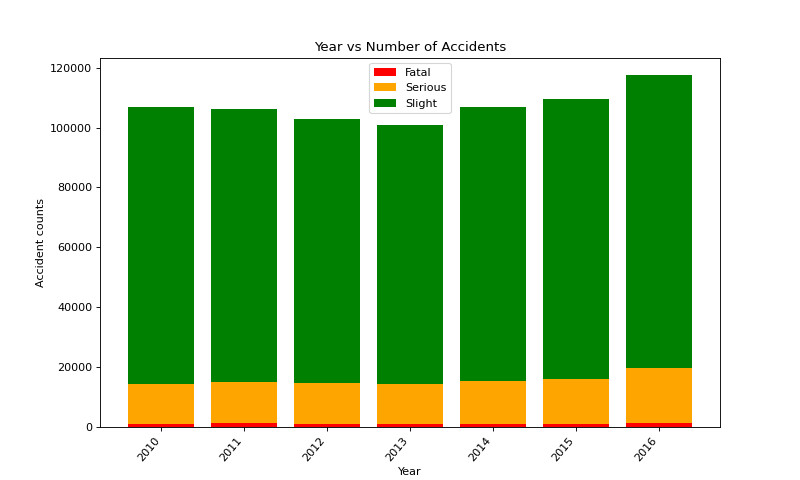

In [27]:
accident_sev_yr = time_df.groupby(['Year','Severity'])['Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_yr.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Year']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Year vs Number of Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Year")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="best")
plt.savefig("Presentation_images/Accident_distribution_year1.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


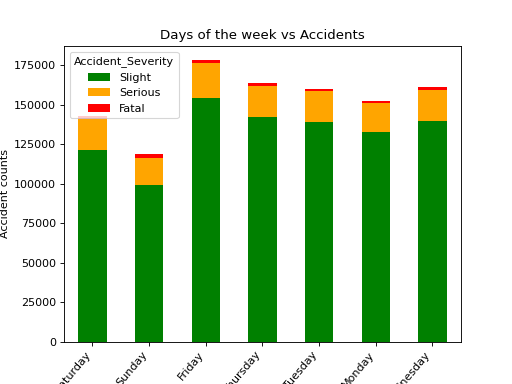

In [28]:
dow_group = when_df.groupby(['Day_of_Week','Accident_Severity'])
dow_group_count = dow_group["Accident_Severity"].count().unstack()
dow_group_count = dow_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
dow_group_count = dow_group_count[["Slight","Serious","Fatal"]]
dow_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Days of the week vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Day")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Presentation_images/Accident_distribution_day_of_week.png", bbox_inches = "tight")

In [29]:
acc_tot = accident_sev_yr
acc_tot["Total"] = acc_tot["Fatal"]+acc_tot["Serious"]+acc_tot["Slight"]
acc_tot

Severity  Year  Fatal  Serious  Slight   Total
0         2010   1193    13195   92313  106701
1         2011   1250    13680   91390  106320
2         2012   1112    13727   88086  102925
3         2013   1132    13160   86421  100713
4         2014   1175    14096   91528  106799
5         2015   1220    14784   93669  109673
6         2016   1480    18177   97817  117474

<IPython.core.display.Javascript object>


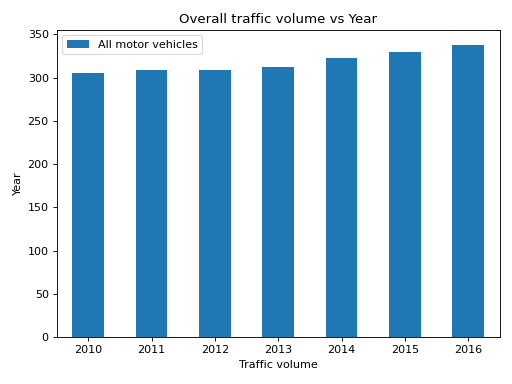

In [30]:
traffic_vol_df["All motor vehicles"] = traffic_vol_df["All motor vehicles"]
sorted_traffic_vol_df = traffic_vol_df.sort_values("Year", ascending=True)
sorted_traffic_vol_df.plot.bar(x="Year", y="All motor vehicles", linestyle="-")
plt.title('Overall traffic volume vs Year')
plt.xticks(rotation = 0,)

plt.xlabel("Traffic volume")
plt.ylabel("Year")
plt.legend(loc="best")
plt.savefig("Presentation_images/Overall_traffic_volume.png", bbox_inches = "tight")
plt.tight_layout()


In [31]:
all_df = when_df

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077653 entries, 0 to 1077652
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1077653 non-null  int64  
 1   Accident_Index               1077653 non-null  object 
 2   1st_Road_Class               1077653 non-null  object 
 3   Accident_Severity            1077653 non-null  object 
 4   Year                         1077653 non-null  int64  
 5   Date                         1077653 non-null  object 
 6   Day_of_Week                  1077653 non-null  object 
 7   Latitude                     1077653 non-null  float64
 8   Light_Conditions             1077653 non-null  object 
 9   Local_Authority_(District)   1077653 non-null  object 
 10  Longitude                    1077653 non-null  float64
 11  Number_of_Casualties         1077653 non-null  int64  
 12  Number_of_Vehicles           1077653 non-n

<IPython.core.display.Javascript object>


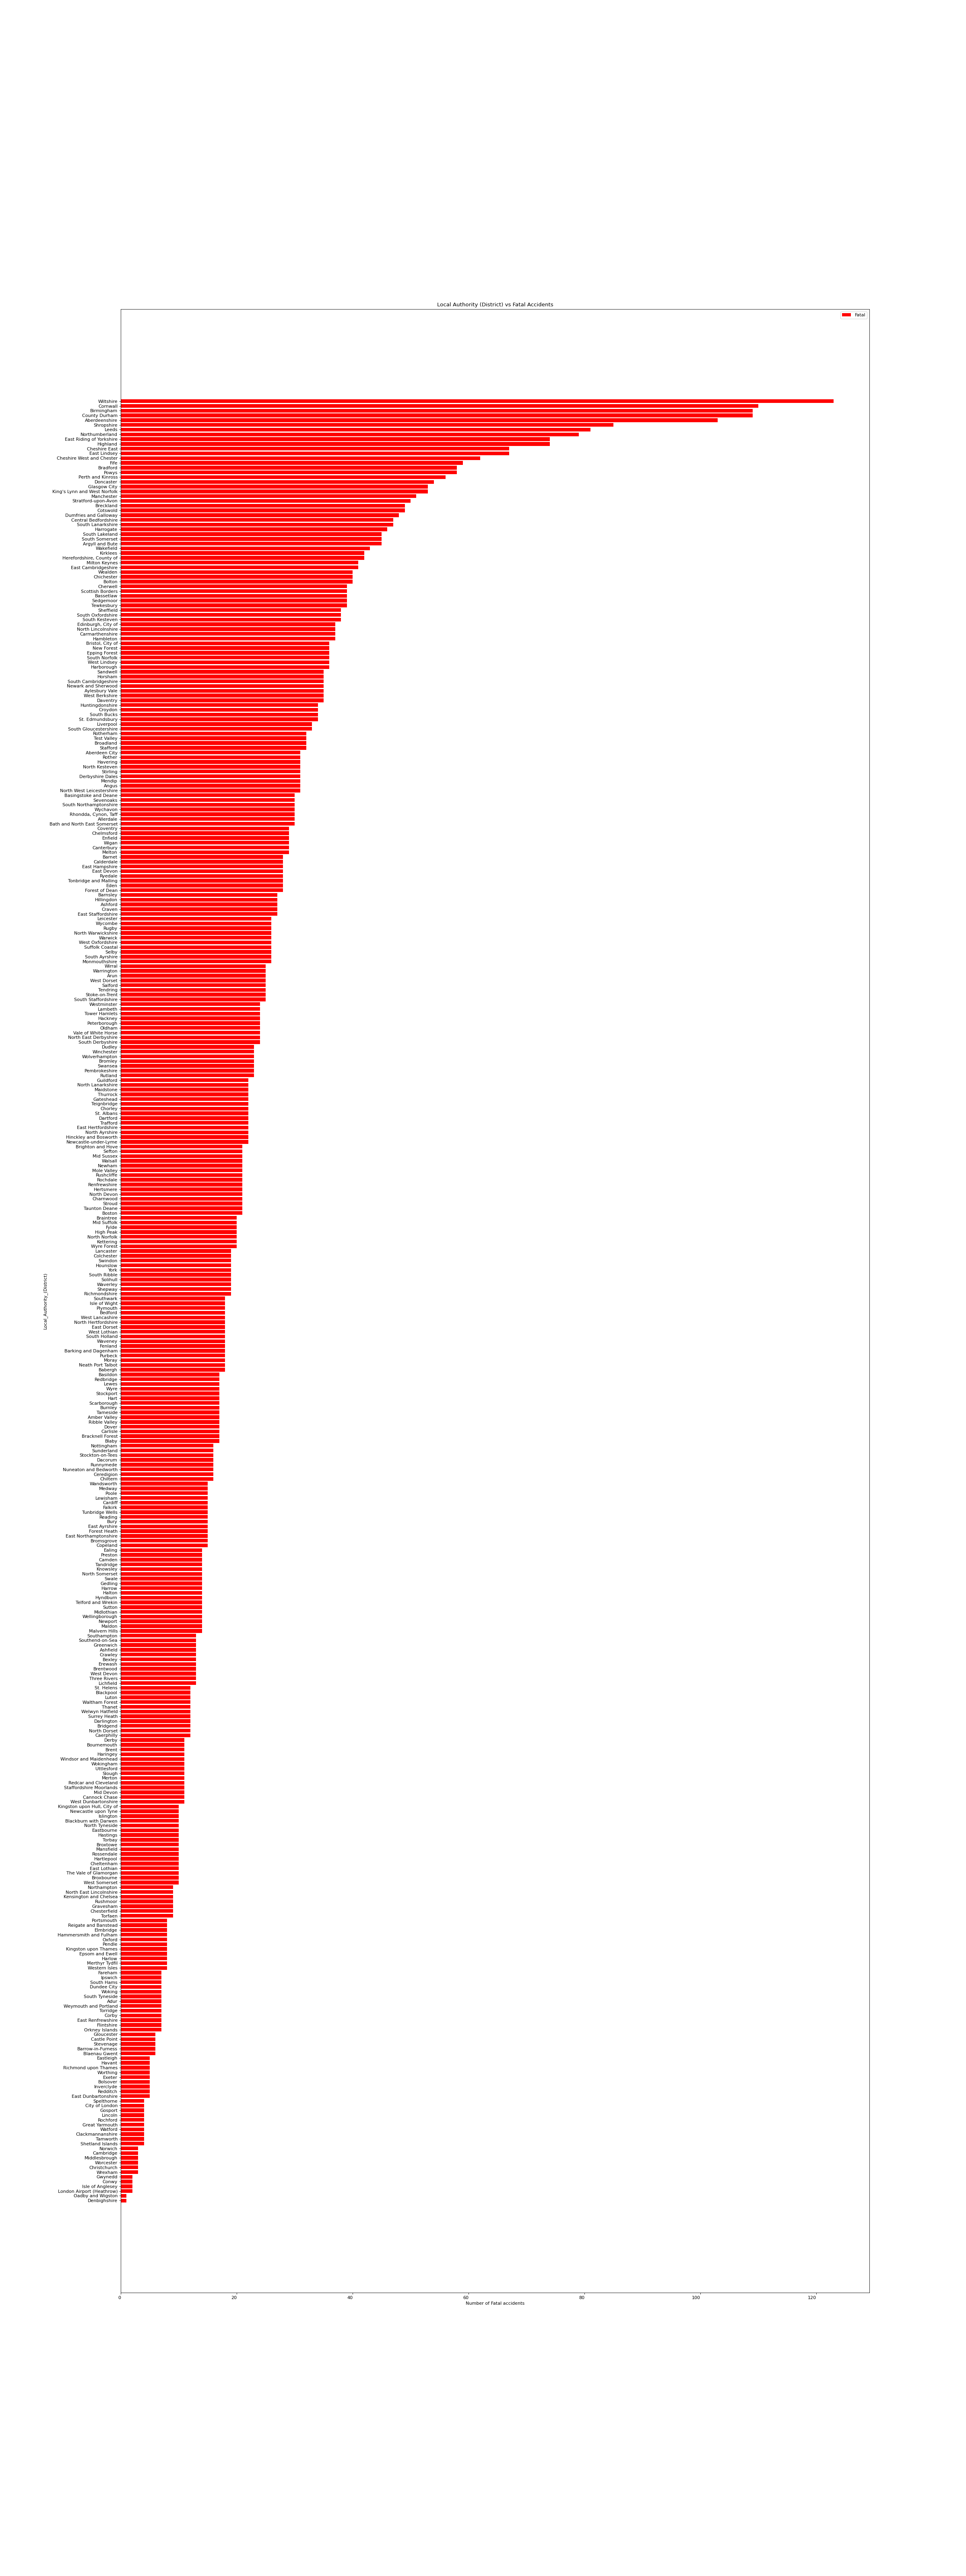

In [32]:
accident_sev_dist = all_df.groupby(['Local_Authority_(District)','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dist.sort_values(by=['Fatal','Serious','Slight'], ascending=True)

bar1 = sorted_df['Fatal']
#bar2 = sorted_df['Serious']
#bar3 = sorted_df['Slight']

r = sorted_df['Local_Authority_(District)']

#sum12 = bar1+bar2

plt.figure(figsize=(30,80))
plt.title('Local Authority (District) vs Fatal Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Number of Fatal accidents")
plt.ylabel("Local_Authority_(District)")
plt.barh(r,bar1,color='red', label='Fatal')
#plt.barh(r,bar2, bottom=bar1,color='green', label='Serious')
#plt.barh(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Fatal_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()


<IPython.core.display.Javascript object>


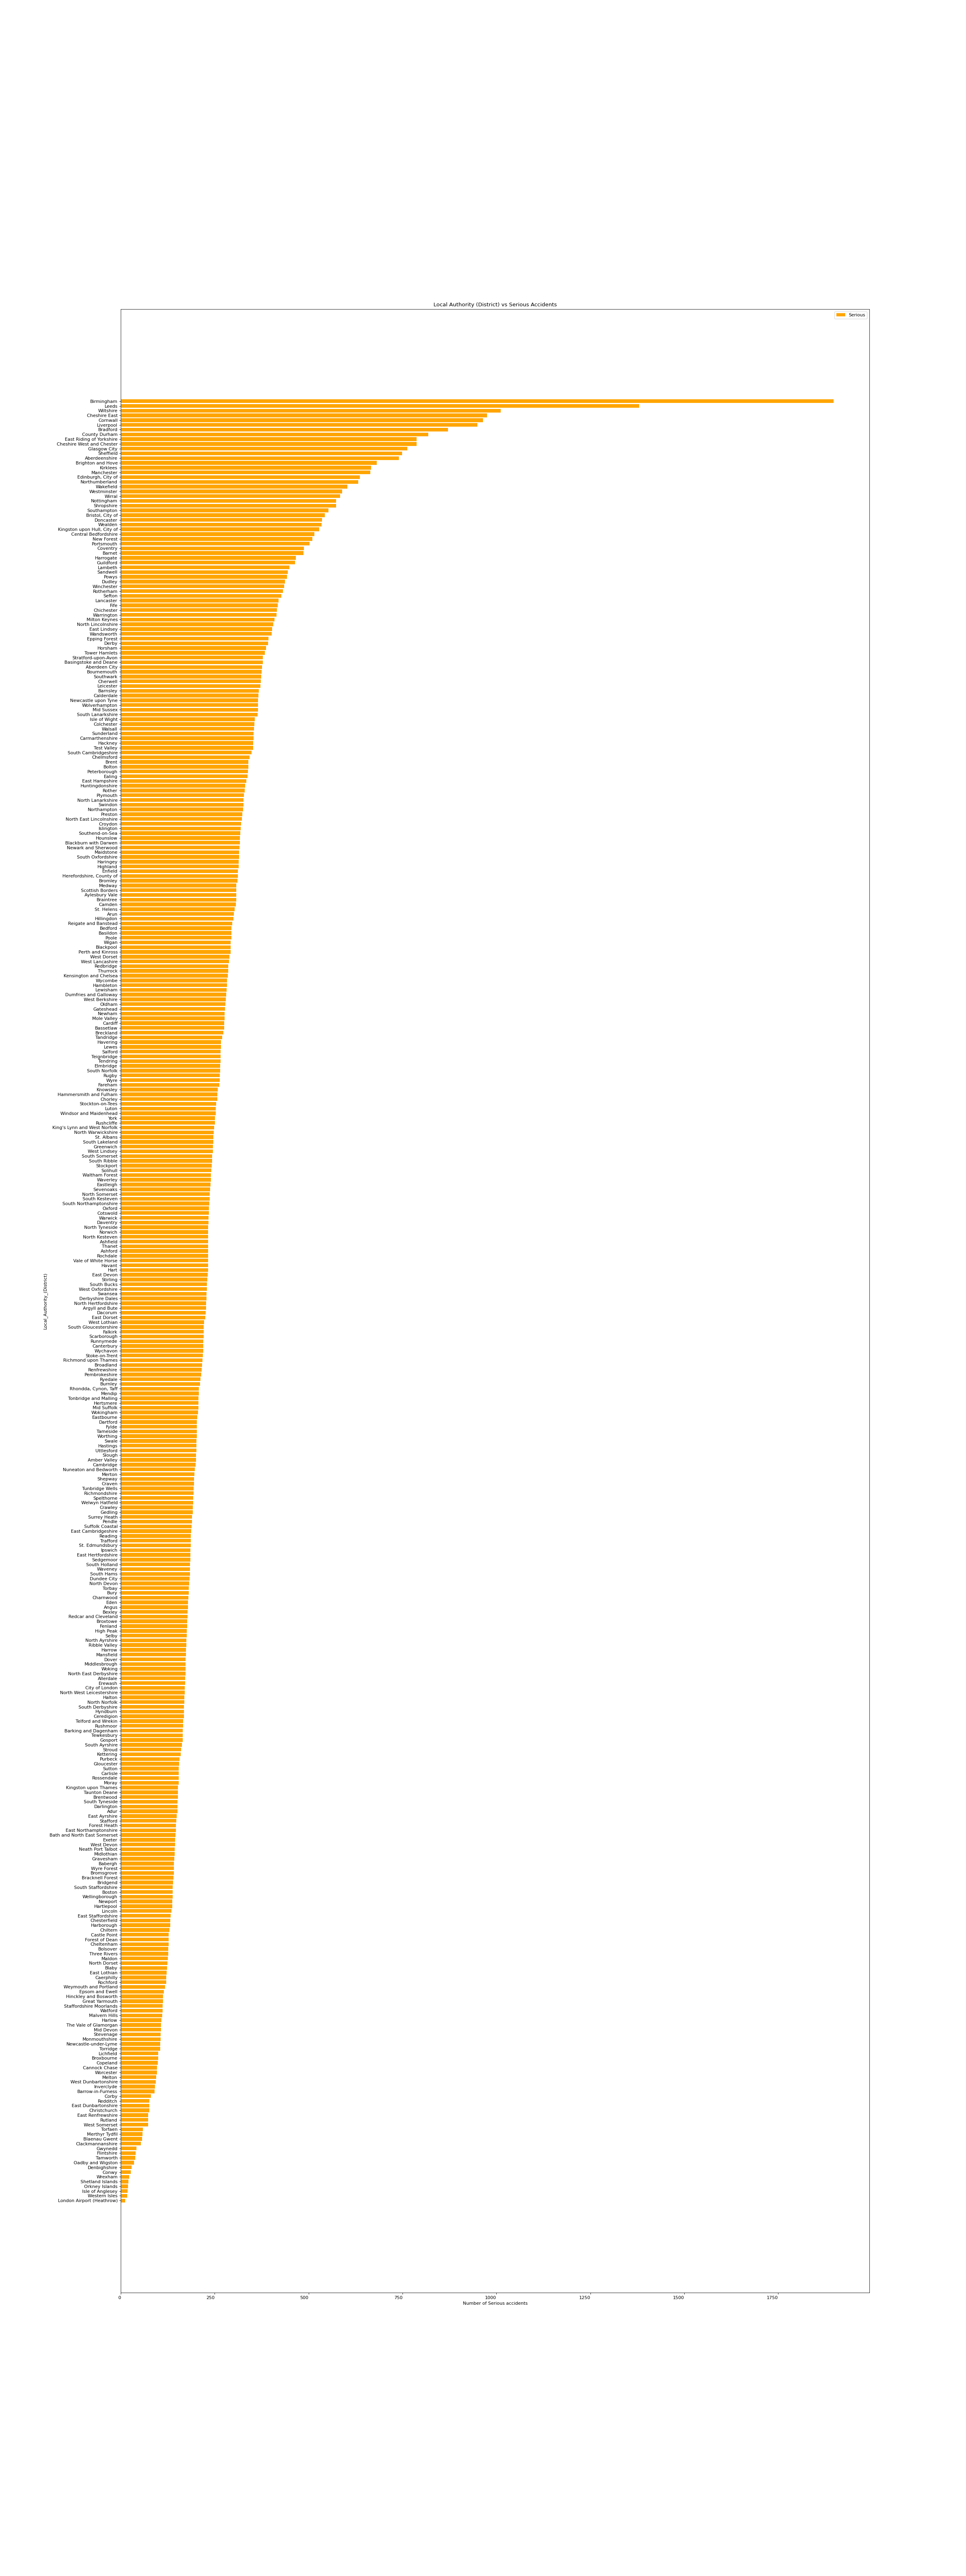

In [33]:
accident_sev_dist = all_df.groupby(['Local_Authority_(District)','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dist.sort_values(by=['Serious','Slight'], ascending=True)

bar1 = sorted_df['Serious']
#bar2 = sorted_df['Serious']
#bar3 = sorted_df['Slight']

r = sorted_df['Local_Authority_(District)']

#sum12 = bar1+bar2

plt.figure(figsize=(30,80))
plt.title('Local Authority (District) vs Serious Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Number of Serious accidents")
plt.ylabel("Local_Authority_(District)")
plt.barh(r,bar1,color='orange', label='Serious')
#plt.barh(r,bar2, bottom=bar1,color='green', label='Serious')
#plt.barh(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Serious_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()

In [34]:
# create chart 2 of Local Authority against the number of incidents
ladf= all_df["Local_Authority_(District)"].value_counts()
ladf.values
ladf.index

Index(['Birmingham', 'Leeds', 'Cornwall', 'Bradford', 'Glasgow City',
       'Wiltshire', 'Sheffield', 'Liverpool', 'Westminster', 'Cheshire East',
       ...
       'Flintshire', 'Gwynedd', 'Conwy', 'Wrexham', 'Denbighshire',
       'London Airport (Heathrow)', 'Shetland Islands', 'Western Isles',
       'Orkney Islands', 'Isle of Anglesey'],
      dtype='object', length=380)

In [35]:
ladf1=ladf.head(20)
ladf1

Birmingham                   21504
Leeds                        14560
Cornwall                     10199
Bradford                     10060
Glasgow City                  9604
Wiltshire                     9165
Sheffield                     8954
Liverpool                     8554
Westminster                   8412
Cheshire East                 8230
Barnet                        8127
County Durham                 8058
Edinburgh, City of            7641
Manchester                    7428
Kirklees                      7367
Ealing                        7125
Doncaster                     6864
Bristol, City of              6818
Nottingham                    6788
Cheshire West and Chester     6783
Name: Local_Authority_(District), dtype: int64

In [36]:
ladf1.index

Index(['Birmingham', 'Leeds', 'Cornwall', 'Bradford', 'Glasgow City',
       'Wiltshire', 'Sheffield', 'Liverpool', 'Westminster', 'Cheshire East',
       'Barnet', 'County Durham', 'Edinburgh, City of', 'Manchester',
       'Kirklees', 'Ealing', 'Doncaster', 'Bristol, City of', 'Nottingham',
       'Cheshire West and Chester'],
      dtype='object')

<IPython.core.display.Javascript object>


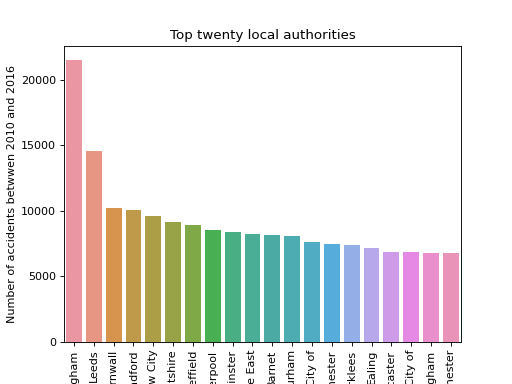

In [37]:
sns.barplot(y=ladf1, x=ladf1.index)


plt.title("Top twenty local authorities")
plt.xlabel("Local Authority Name")
plt.ylabel("Number of accidents betwwen 2010 and 2016")


plt.xticks(rotation=90)
plt.savefig("Presentation_images/Top-20_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()

In [38]:
# create chart 2 of Local Authority against the number of incidents
abddf= all_df["Age_Band_of_Driver"].value_counts()
abddf.values
abddf.index

Index(['26 - 35', '36 - 45', '46 - 55', '21 - 25', '56 - 65', '16 - 20',
       'Data missing or out of range', '66 - 75', 'Over 75', '11 - 15',
       '6 - 10', '0 - 5'],
      dtype='object')

<IPython.core.display.Javascript object>


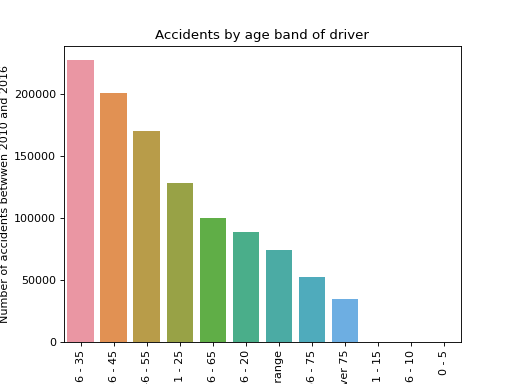

In [39]:
sns.barplot(y=abddf, x=abddf.index)


plt.title("Accidents by age band of driver")
plt.xlabel("Age band of driver")
plt.ylabel("Number of accidents betwwen 2010 and 2016")


plt.xticks(rotation=90)
plt.savefig("Presentation_images/Top-20_Accident_distribution_age_band_of_driver.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


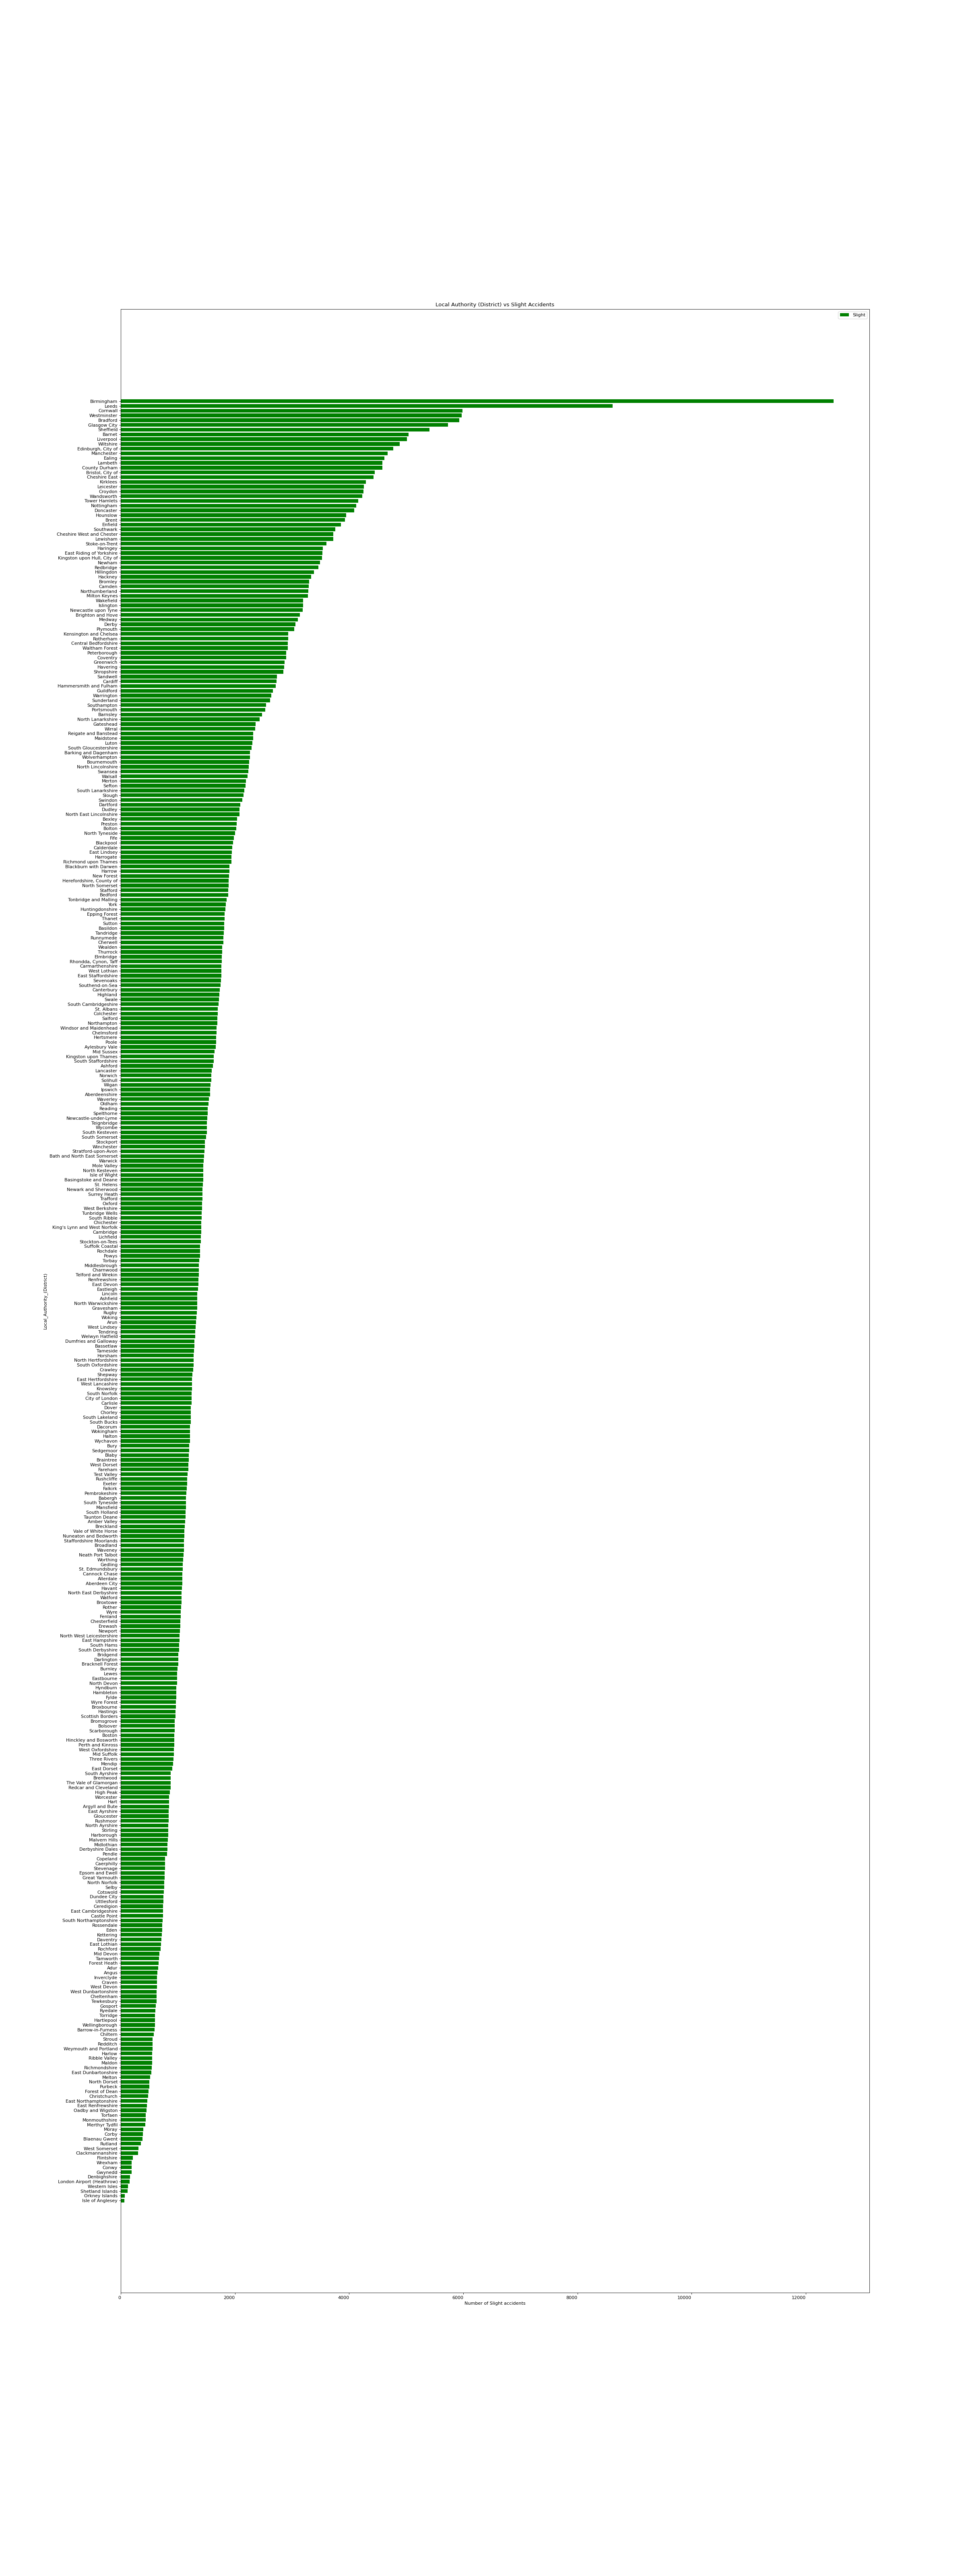

In [40]:
accident_sev_dist = all_df.groupby(['Local_Authority_(District)','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_dist.sort_values(by=['Slight'], ascending=True)

bar1 = sorted_df['Slight']
#bar2 = sorted_df['Serious']
#bar3 = sorted_df['Slight']

r = sorted_df['Local_Authority_(District)']

#sum12 = bar1+bar2

plt.figure(figsize=(30,80))
plt.title('Local Authority (District) vs Slight Accidents')
plt.xticks(rotation = 0, horizontalalignment="right")

plt.xlabel("Number of Slight accidents")
plt.ylabel("Local_Authority_(District)")
plt.barh(r,bar1,color='green', label='Slight')
#plt.barh(r,bar2, bottom=bar1,color='green', label='Serious')
#plt.barh(r,bar3,bottom=sum12,color='orange',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Slight_Accident_distribution_Local_Authority_(District).png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


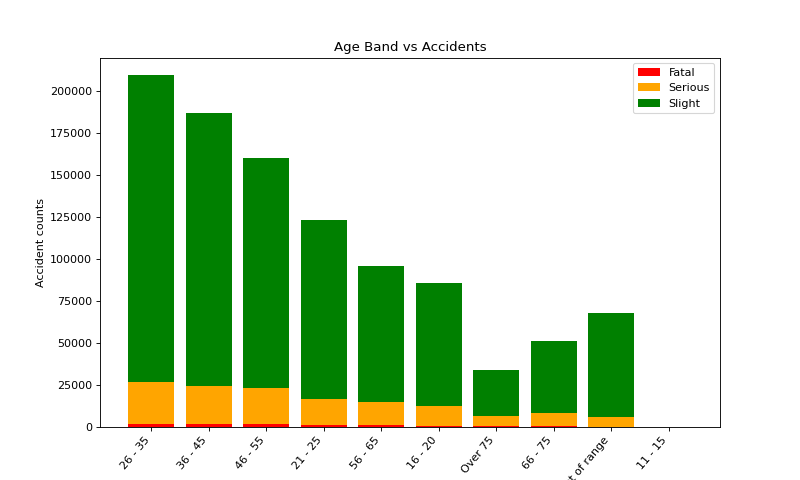

In [41]:
accident_sev_age = all_df.groupby(['Age_Band_of_Driver','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_age.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Age_Band_of_Driver']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Age Band vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Age Band")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Presentation_images/Accident_distribution_Age_Band.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


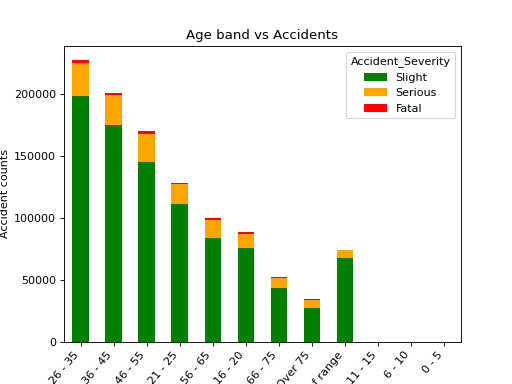

In [42]:
ab_group = all_df.groupby(['Age_Band_of_Driver','Accident_Severity'])
ab_group_count = ab_group["Accident_Severity"].count().unstack()
ab_group_count = ab_group_count.sort_values(by=["Fatal","Serious","Slight"], ascending=False)
ab_group_count = ab_group_count[["Slight","Serious","Fatal"]]
ab_group_count.plot.bar(stacked=True, color={"Fatal": "red", "Serious": "orange", "Slight":"green"})
# plt.figure(figsize=(10,6))
plt.title('Age band vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Age band")
plt.ylabel("Accident counts")
#print(tod_group_count)
plt.savefig("Presentation_images/Accident_distribution_age_band.png", bbox_inches = "tight")

<IPython.core.display.Javascript object>


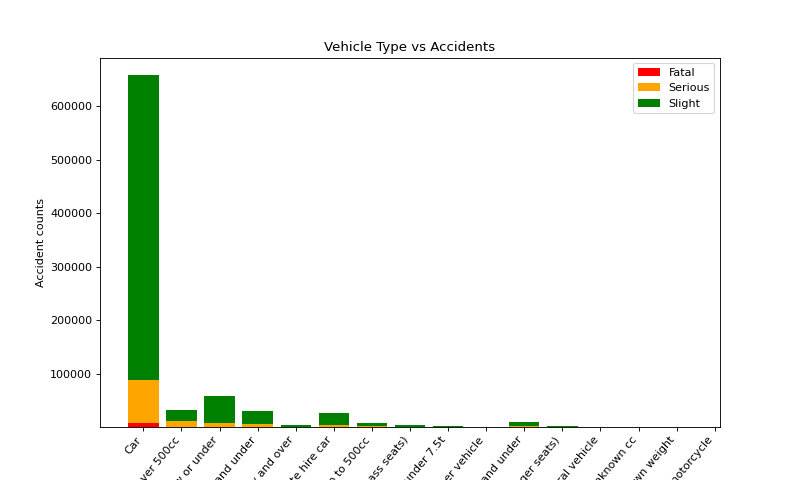

In [43]:
accident_sev_type = all_df.groupby(['Vehicle_Type','Accident_Severity'])['Accident_Index'].nunique().unstack().reset_index()
sorted_df=accident_sev_type.sort_values(by=['Fatal','Serious','Slight'], ascending=False)

bar1 = sorted_df['Fatal']
bar2 = sorted_df['Serious']
bar3 = sorted_df['Slight']

r = sorted_df['Vehicle_Type']

sum12 = bar1+bar2

plt.figure(figsize=(10,6))
plt.title('Vehicle Type vs Accidents')
plt.xticks(rotation = 50, horizontalalignment="right")

plt.xlabel("Vehicle_Type")
plt.ylabel("Accident counts")
plt.bar(r,bar1,color='red', label='Fatal')
plt.bar(r,bar2, bottom=bar1,color='orange', label='Serious')
plt.bar(r,bar3,bottom=sum12,color='green',label='Slight')
plt.legend(loc="upper right")
plt.savefig("Images/Accident_distribution_Vehicle_Type.png", bbox_inches = "tight")
plt.show()

<IPython.core.display.Javascript object>


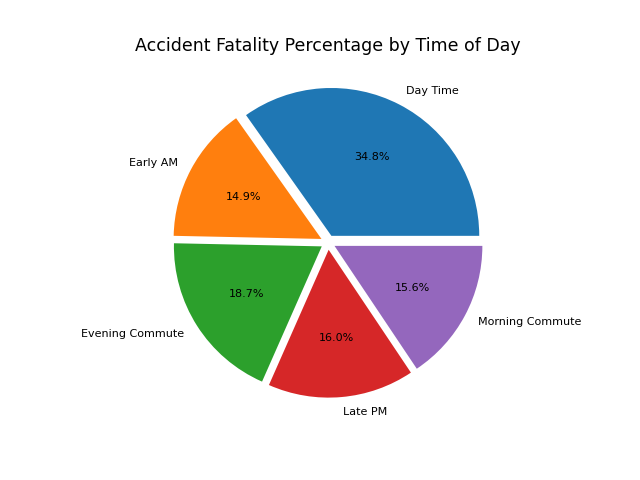

In [44]:
accident_counts = time_df.groupby(['Time_Bin', 'Severity']).size()
accident_counts = accident_counts.unstack(['Severity'])
acc_counts_dropped = accident_counts.drop(accident_counts.columns[[1,2]],axis=1)
total=acc_counts_dropped['Fatal'].sum()
acc_counts_dropped['Percent Fatality']=round(acc_counts_dropped['Fatal']/total*100, 2)
final_acc_df = acc_counts_dropped.reset_index()
plt.figure(figsize=(8,6))
explode = [0.05,0.05,0.05,0.05,0.05]
my_data = acc_counts_dropped['Percent Fatality'].tolist()
my_labels = final_acc_df['Time_Bin'].tolist()
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', explode=explode)
plt.rcParams['font.size'] = 13
plt.title('Accident Fatality Percentage by Time of Day')
plt.savefig("Images/Accident_Fatality_%_by_Time_of_Day.png", bbox_inches = "tight")
plt.show()